# Kolmogorov-Smirnov (KS) Test Statistic
### Description
This notebook demonstrates the [Kolmogorov-Smirnov (KS) test](https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test) $D$-statistic and [$p$-value](https://en.wikipedia.org/wiki/P-value) as a function of the number of points drawn from a given sample. The $D$-statistic represents the maximum distance between the CDFs of the sample distribution and the comparison distribution. A small $D$ statistic suggests that the samples are indeed drawn from the comparison distribution. I am unclear on how to interpret the $p$-value for this test, as described in further detail [below](#uncertainty).

First, we make the standard imports, and define a function to compare random samples drawn from our defined distribution with an underlying "truth" distribution. We vary the sample sizes from 1 to 10 million.

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from cycler import cycler
from scipy.stats import norm, uniform, kstest

import warnings
warnings.simplefilter('default', UserWarning)
warnings.simplefilter('default', RuntimeWarning)

np.random.seed(56) # ensure repeatability

def make_kstest_plots(dist, compare='norm'):
    fig = plt.figure(1)
    plt.clf()
    ax = plt.gca()

    # log-space array from 1 to 10M
    n = np.array([int(10**i) for i in range(7)])
    n = np.hstack((n, 3*n))
    n.sort()
    
    D = np.zeros(n.size)
    p = np.zeros(n.size)
    rvs = []
    for i in range(n.size):
        # Kolmogorov-Smirnov test if RVs drawn from compare
        rvs.append(dist.rvs(size=n[i]))
        D[i], p[i] = kstest(rvs[i], compare)

    ax.plot(n, D, c='C3', label='D statistic')
    ax.plot(n, p, c='C0', label='p-value')
    ax.set_title('KS Test Statistics')
    ax.set_xscale('log')
    ax.set_ylim([0, 1])
    ax.legend()

    plt.figure(2, figsize=(11, 5))
    plt.clf()
    ax = plt.gca()
    ax.set_prop_cycle(cycler('color', 
                            [plt.cm.viridis(i) for i in np.linspace(0, 1, n.size)]))
    for i in range(n.size):
        sns.distplot(rvs[i], hist=False, ax=ax, label='n = {:2.2g}'.format(n[i]))
    ax.set_title('Gaussian KDE')
    ax.legend()

    plt.show(block=False)

## Comparing Uniform to Normal
In our next test, we compare samples drawn from a standard uniform distribution $X \sim U[0,1]$ to a standard normal distribution $\mathcal{N}(\mu, \sigma)$, where $\mu = 0$, $\sigma = 1$.

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


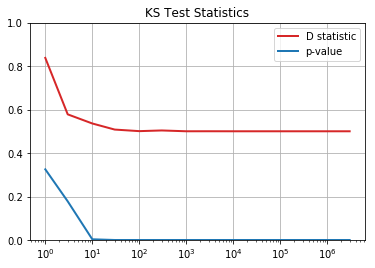

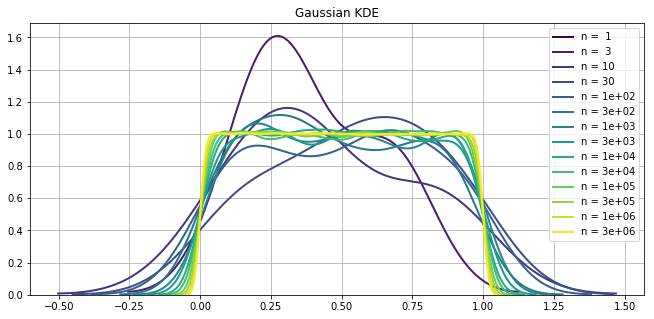

In [26]:
# Define uniform distribution
dist = uniform(loc=0, scale=1)
compare = 'norm' # compare to normal distribution
make_kstest_plots(dist, compare)

### Results
In this case, the $D$ statistic converges to $D = 0.5$ as $n \to \infty$. We expect this value given the definition of $D$ as the maximum distance between the sample CDF and the comparison distribution CDF. In this case, the $p$-value also decays to 0, meaning there is 0 probability that...?

## Comparing a uniform distribution to itself
Now, we run the test comparing a random variable $X$ drawn from a uniform distribution $X \sim U[0,1]$ to the underlying uniform distribution itself.

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


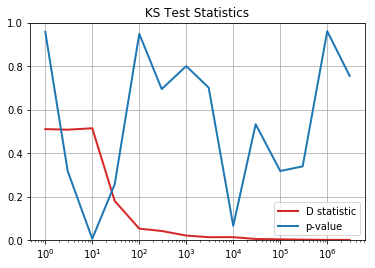

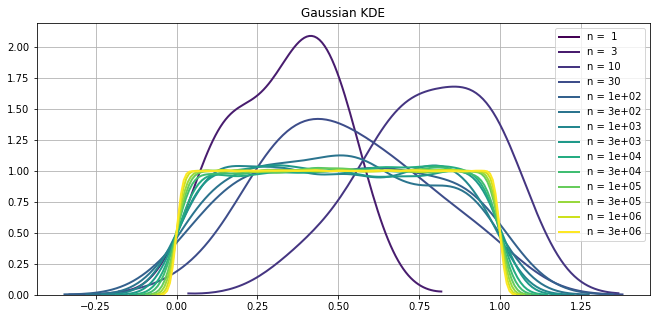

In [27]:
# Define uniform distribution
dist = uniform(loc=0, scale=1)
compare = 'uniform' # compare to itself
make_kstest_plots(dist, compare)

### Results
We see that, in the first plot, the $D$-statistic shrinks to 0 as $n \to \infty$, showing that our samples are indeed approaching a true uniform distribution. The second plot shows the Gaussian Kernel Density Estimate (KDE) of each of the sets of random samples, which also approach a true uniform distribution $X \sim U[0,1]$.

#### Uncertainty
<a id='uncertainty'></a>
The $p$-value of the test is quite noisy. I am not entirely sure how to interpret it. [Minitab docs](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/normality-test/interpret-the-results/all-statistics-and-graphs/#ks) report:

> The $p$-value is the probability of obtaining a test statistic (such as the Kolmogorov-Smirnov statistic) that is at least as extreme as the value that is calculated from the sample, when the data are normal.

Does "extreme" mean "as small as"? Or "as large as"? Typically we'd like a small $p$-value so that we can reject the null hypothesis that our two samples are drawn from the same distribution, but in this case we are in fact trying to test that the samples are drawn from a know underlying distribution. The high noise suggests that the $p$-value loses its typical interpretation here.

We get a nearly identical result if we compare a standard normal distribution to itself [see below](#appendix).

## Appendix: Comparing Normal to Normal
<a id='appendix'></a>

Much like the test performed above, we compare random variables drawn from a standard normal distribution to the actual standard normal distribution from which they were drawn. We expect the $D$ statistic to approach 0 as $n \to \infty$.


/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


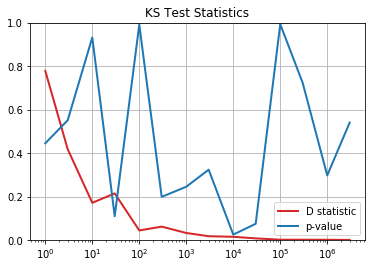

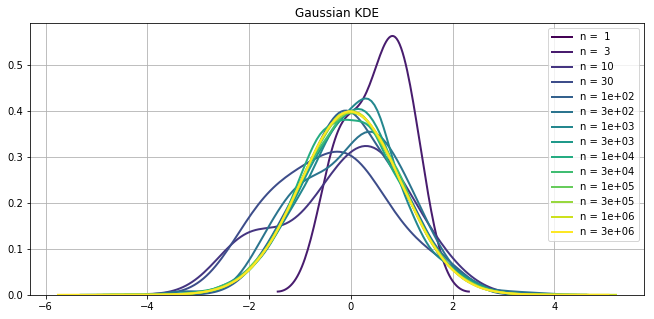

In [28]:
# Define standard normal distribution
dist = norm(loc=0, scale=1)
compare = 'norm' # compare to normal distribution
make_kstest_plots(dist, compare)